<a href="https://colab.research.google.com/github/kaioalexandre/irisflower/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

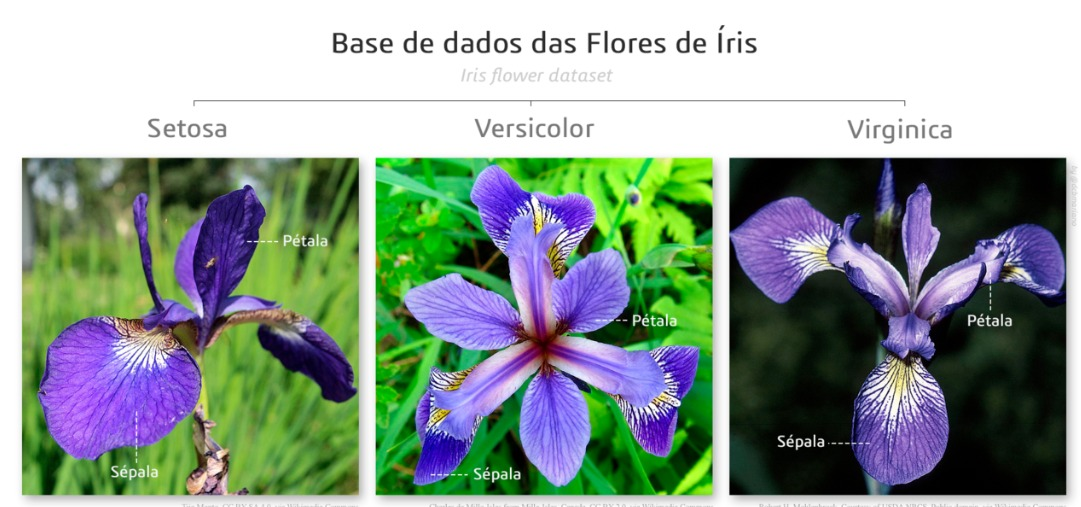

**O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris ( Iris setosa, Iris virginica e Iris versicolor). Quatro variáveis foram medidas em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros.**

# Importando as bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GroupKFold
%matplotlib inline


In [ ]:
!pip install pydotplus
!apt-get install graphviz -y

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


# Carregando e preparando o dataset
 

In [ ]:
iris_set = datasets.load_iris()
iris_data = pd.DataFrame(iris_set.data, columns=iris_set.feature_names)

iris_data["species"] = iris_set.target
iris_data.columns = ['comprimento da sépala (cm)', 'largura da sépala (cm)','comprimento da pétala (cm)', 'largura da pétala (cm)', 'espécie']

iris_data.head()

,comprimento da sépala (cm),largura da sépala (cm),comprimento da pétala (cm),largura da pétala (cm),espécie
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**0 = iris setosa; 1 = iris versicolor; 2 = iris virgínica**

In [ ]:
iris_data['espécie'].value_counts()

0    50
1    50
2    50
Name: espécie, dtype: int64

**o dataset possui 150 dados, sendo 50 de cada espécie**

In [ ]:
iris_data.isnull().sum()

comprimento da sépala (cm)    0
largura da sépala (cm)        0
comprimento da pétala (cm)    0
largura da pétala (cm)        0
espécie                       0
dtype: int64

**O dataset não possui valores faltando**

# Criando um dummy classifier

**Esse classificador assume a mesma resposta pra todos os testes e isso nos dar uma precisão mínima que deve ser aceita**

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris_data, test_size = 0.30)

In [ ]:
treino_x = train[['comprimento da sépala (cm)', 'largura da sépala (cm)','comprimento da pétala (cm)', 'largura da pétala (cm)']]
treino_y = train.espécie
teste_x = test[['comprimento da sépala (cm)', 'largura da sépala (cm)','comprimento da pétala (cm)', 'largura da pétala (cm)']]
teste_y = test.espécie

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(treino_x, treino_y)
dummy_clf.predict(treino_x)

s = dummy_clf.score(treino_x, treino_y)*100
#print("A acurácia do dummy stratified foi %.2f%%" % s)

In [ ]:
s

38.095238095238095

# 1° modelo

**O primeio modelo foi construido da maneira mais simples, usando todos os valores e sem preprocessamento da base de dados**

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris_data, test_size = 0.30)
train.shape, test.shape

((105, 5), (45, 5))

*os dados foram separados em treino e teste, sendo 30% para testes*

In [ ]:
treino_x = train[['comprimento da sépala (cm)', 'largura da sépala (cm)','comprimento da pétala (cm)', 'largura da pétala (cm)']]
treino_y = train.espécie
teste_x = test[['comprimento da sépala (cm)', 'largura da sépala (cm)','comprimento da pétala (cm)', 'largura da pétala (cm)']]
teste_y = test.espécie

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(treino_x,treino_y)
predictions = dt.predict(teste_x)
a = (metrics.accuracy_score(predictions, teste_y))
a = a*100
a= ("%.2f" % a)
#print("A precisão é:",a,"%")


In [ ]:
a

'97.78'

In [ ]:
X = iris_data[['comprimento da sépala (cm)', 'largura da sépala (cm)','comprimento da pétala (cm)', 'largura da pétala (cm)']]
Y = iris_data.espécie
dtree1 = DecisionTreeClassifier()
dtree1.fit(X,Y)

DecisionTreeClassifier()

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

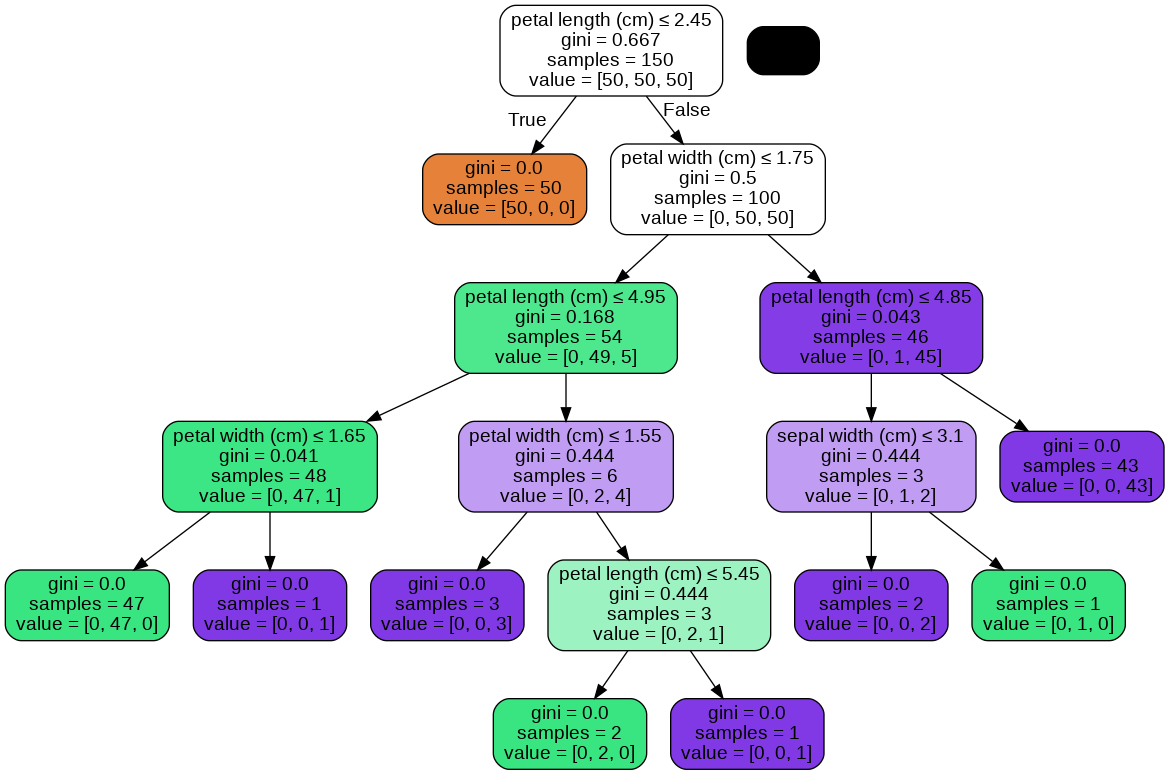

In [ ]:
dot_data = StringIO()
export_graphviz(dtree1, out_file=dot_data, feature_names=iris_set.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**O primeiro modelo apresentou uma ótima precisão, porém isso só foi possível porque a base de dados é bem simple. Alguns processos podem ser feitos para melhorar e validar o modelo**

# Análise gráfica da base de dados

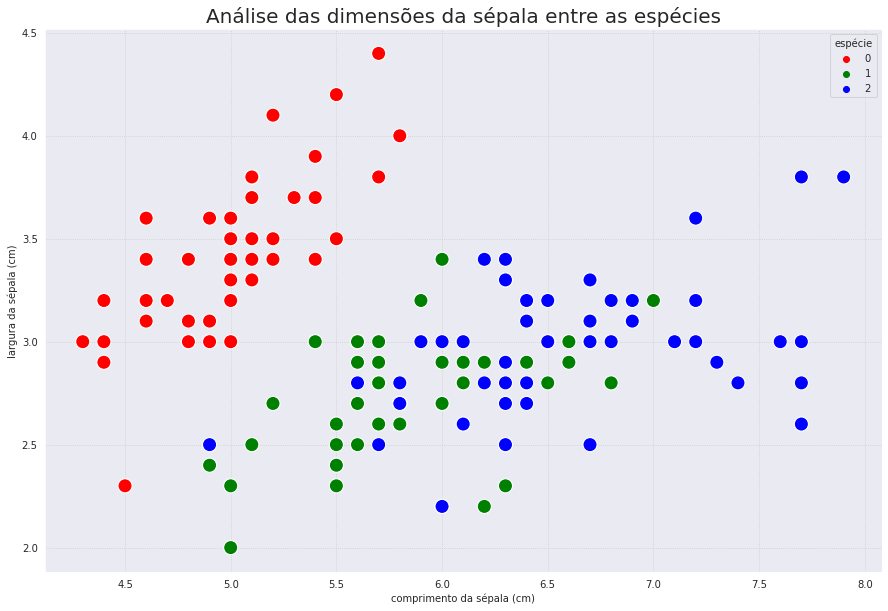

In [ ]:
sns.set_style("darkgrid", {"grid.color": ".8", "grid.linestyle": ":"})
plt.figure(figsize=(15, 10))
plt.title('Análise das dimensões da sépala entre as espécies',fontsize = 20)

sns.scatterplot(x=iris_data["comprimento da sépala (cm)"], 
                y=iris_data["largura da sépala (cm)"], 
                hue=iris_data["espécie"],palette = ["red","green","blue"],
                s=200);

**As espécies virgínica e versicolor possuem as dimensões de células parecidas**

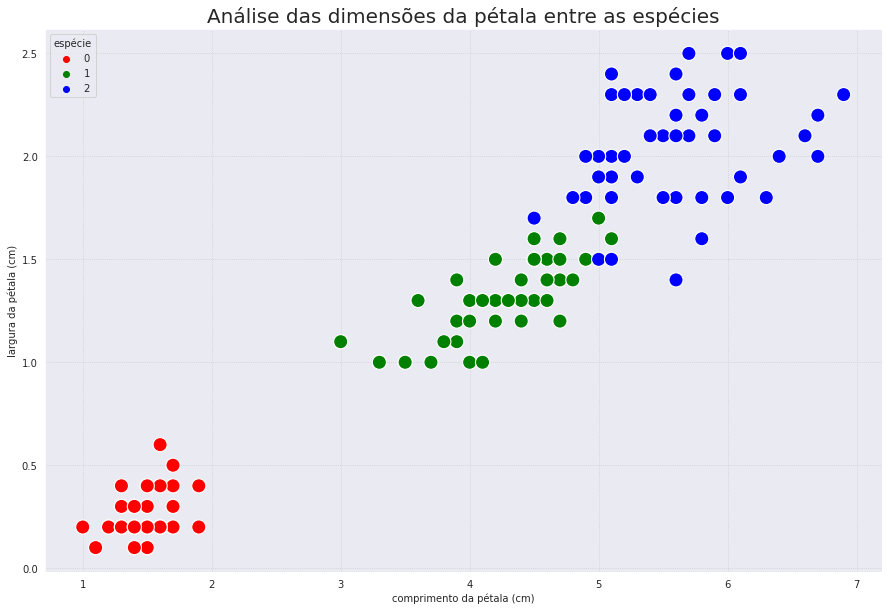

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Análise das dimensões da pétala entre as espécies',fontsize = 20)

sns.scatterplot(x=iris_data["comprimento da pétala (cm)"], 
                y=iris_data["largura da pétala (cm)"], 
                hue=iris_data["espécie"],palette = ["red","green","blue"],
                s=200);

**Com esse scaterplot, podemos observar que oque mais difere as espécies são as dimensões da pétala**

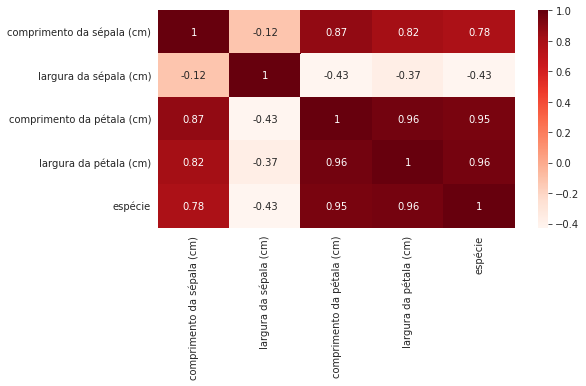

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(iris_data.corr(), annot=True, cmap='Reds');

**O gráfico de correlação reforça isso, sendo assim decidi criar um modelo apenas com as dimensões da pétala, diminuindo metade da base de dados, sendo necessário um menor uso da capacidade de processamento do computador**, 
*que em caso de bases maiores é extremamente necessário utiliza apenas os dados relevantes.*

# 2° modelo

In [ ]:
treino2_x = train[['comprimento da pétala (cm)', 'largura da pétala (cm)']]
treino2_y = train.espécie
teste2_x = test[['comprimento da pétala (cm)', 'largura da pétala (cm)']]
teste2_y = test.espécie
treino2_x.head()

,comprimento da pétala (cm),largura da pétala (cm)
141,5.1,2.3
6,1.4,0.3
128,5.6,2.1
102,5.9,2.1
48,1.5,0.2


In [ ]:
dt2 = DecisionTreeClassifier(max_depth=3)
dt2.fit(treino2_x,treino2_y)
predictions = dt2.predict(teste2_x)
b = (metrics.accuracy_score(predictions, teste2_y))
b = b*100
b= ("%.2f" % b)#precisão



In [ ]:
b

'93.33'

**mais uma vez obtivemos um ótimo resultado, só que agora com metade dos dados,comprovando oque havia sido dito. O próximo passo é validar o modelo através da validação cruzada( ou cross-validation)**                                 

# Analisando hiperparâmetros

In [ ]:
decision_tree  = DecisionTreeClassifier()
decision_tree.fit(treino2_x, treino2_y)

DecisionTreeClassifier()

In [ ]:
decision_tree.predict(teste2_x)

array([2, 0, 1, 1, 0, 2, 2, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 0, 2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1,
       0])

In [ ]:
param_dict = { "criterion": ['gini', 'entropy'], 
              "max_depth": range (1,10), 
              "min_samples_split":range (1,10), 
              "min_samples_leaf":range (1,5)
              }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(decision_tree,
                    param_grid = param_dict,
                    cv = 10,
                    verbose=1,
                    n_jobs=-1)

grid.fit(treino2_x, treino2_y)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 7}

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_split=7)

In [ ]:
grid.best_score_

0.9709090909090909

# Cross-Validation

**A validação cruzada é um método de reamostragem que usa diferentes partes dos dados para testar e treinar um modelo em diferentes iterações**

In [ ]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(criterion = 'gini', 
                              max_depth = 4,  
                              min_samples_split = 7
                              )

variaveis = iris_data[['comprimento da pétala (cm)', 'largura da pétala (cm)']]
iris_data["espécie"] = iris_set.target
scores = cross_val_score(clf,variaveis , iris_set.target, cv=35)
p = scores.mean()# precisão
p = ('%0.2f' % p)
q =  scores.std()#desvio padrão
q = ('%0.2f' % q)


In [ ]:
p, q

('0.95', '0.10')

Aqui aparentemente a precisão dimiunui, porém agor esse modelo é valido, então nesse sim eu posso dizer com uma maior certeza a porcentagem de acerto

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
clf = DecisionTreeClassifier(criterion = 'gini', 
                              max_depth = 4, 
                              min_samples_leaf = 1, 
                              min_samples_split = 7
                              )

variaveis = iris_data[['comprimento da pétala (cm)', 'largura da pétala (cm)']]
iris_data["espécie"] = iris_set.target
scores2 = cross_val_score(clf,variaveis , iris_set.target, cv=cv)

u = scores2.mean()# precisão
u = ('%0.2f' % u)
v = scores2.std()#desvio padrão
v = ('%0.2f' % v)
#print("%0.2f de precisão com um desvio padrão de %0.2f" % (scores2.mean(), scores2.std()))

In [ ]:
u,v

('0.95', '0.03')

com um cv melhor selecionado o desvio padrão passou de 0.10 para 0.03, com isso o meu modelo está validado.